# Preprocessing

본격적인 자연어 처리!

## 형태소 분석 ( Stemming ) : 

제일 첫 단계

토큰 분리, 어간 추출(ngram, 말의 중심어를 찾을 수 있음), 품사 부착, 색인(특정 단어가 몇 번 나왔는지), 벡터화(이해하기 쉽고, 연산하기 좋음)

## 구문 분석 : 

문장 경계 인식, 구문분석, 공기어(A,B단어가 관련이 있는데 멀리 있어서, 쌍으로 인식), 개체명 사전 구축, 개체명 인식


## 의미 분석 : 

지금 잘 안되는 분야!

대용어 해소(대명사, 두문자어, 약어, 수치), 의미 중의성 해결 ( 동명이인, 이명동인 )

## 담론 분석 :

분류, 군집, 중복, 요약, 가중치, 순위화, 토픽 모델링, 이슈 트래킹, 평판 분석, 감성 분석, 복합논증분석




쪼개면서 분석해가는 것 ! ( 담화 -> 문장 -> 어절 -> 단어 )



# KoNLPy, NLTK(영어)

In [15]:
!python --version
# 3.7 이상 버전에서 pip3 install konlpy 실행됨
# 3.6에서는 JPype error 발생

Python 3.7.2


In [1]:
from konlpy.corpus import kobill, kolaw
kobill.fileids()
kolaw.fileids()
c = kolaw.open("constitution.txt").read()
# c

In [19]:
# ! pip install nltk

In [20]:
import nltk

# 유명한 Corpora만 골라서 다운로드
nltk.download('brown')
nltk.download('gutenberg')


[nltk_data] Downloading package brown to /Users/charming/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/charming/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [23]:
# nltk.download() 하면 링크 떠서 확인하면 됨  / 더블 클릭해서 설치 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [28]:
from nltk.corpus import brown, gutenberg

c = brown.open(brown.fileids()[0]).read()
# 앞 3줄만
c.splitlines()[:3]
# / 뒤에 품사가 등장한다. 

['',
 '',
 "\tThe/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./."]

# 품사표 : 

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [32]:
c = gutenberg.open(gutenberg.fileids()[0]).read()
c.splitlines()[:3]

# 품사 , 형태소가 없음. Raw text이다. 

['[Emma by Jane Austen 1816]', '', 'VOLUME I']

In [33]:
from nltk.tokenize import sent_tokenize

nltk.download('punkt')
# punkt = 구두점

[nltk_data] Downloading package punkt to /Users/charming/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
# nltk.tokenize.sent_tokenize( text, language='')

s = sent_tokenize(c) # 문장 단위로 끊어질 것 이다. 

In [37]:
len(c.splitlines()),  len(s)  # 라인 별로 자른 것 . / 문장 단위로 끊은 것 

(16823, 7493)

In [38]:
s[:3]
# 마침표를 기준으로 3개를 쪼개놨다. 
# 제목이 문장의 일부로 남아있다. 

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.']

In [39]:
from nltk.tokenize import word_tokenize

# 단어 단위로 쪼개주는 함수 
words = word_tokenize(s[0])
print(words)

# 문장을 넣었으니 마지막은 .으로 나온다. 



['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [50]:
sent_tokenize("Hello World. Hello World.")   # . ? !로 잘림 ... 말 줄임표는 인식 못함   

['Hello World.', 'Hello World.']

In [51]:
sent_tokenize("오늘 미세먼지 보통이다. 불금을 즐기자!")   # sent_tokenize는 그대로 써도 됨 ! 
# 띄어쓰기 안되어있으면 자를 수가 없음. 

['오늘 미세먼지 보통이다.', '불금을 즐기자!']

In [52]:
from nltk.tokenize import TweetTokenizer

In [56]:
TweetTokenizer().tokenize("오늘 미세먼지 보통이다. 불금을 즐기자! :) :()")
# 이모티콘을 인식함 ( 감정 표현 )
# 문어체보다 구어체 분석에 잘 어울림

['오늘', '미세먼지', '보통이다', '.', '불금을', '즐기자', '!', ':)', ':(', ')']

In [55]:
word_tokenize("오늘 미세먼지 보통이다. 불금을 즐기자! :) :()")
# 이모티콘을 그냥 기호로 인식함

['오늘', '미세먼지', '보통이다', '.', '불금을', '즐기자', '!', ':', ')', ':', '(', ')']

In [61]:
# 정규식을 가지고 자름 
from nltk.tokenize import regexp_tokenize
# 추가적으로 패턴이 필요함
regexp_tokenize(s[2], "([A-Za-z]+)")  
# A-Z a-z 가 한 개 이상 나오는 조합 

['Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'had',
 'been',
 'supplied',
 'by',
 'an',
 'excellent',
 'woman',
 'as',
 'governess',
 'who',
 'had',
 'fallen',
 'little',
 'short',
 'of',
 'a',
 'mother',
 'in',
 'affection']

In [62]:
pattern = "([가-힣]+)" # 한글만 추출
regexp_tokenize("오늘 미세먼지 보통이다. 불금을 즐기자! :) :()",pattern)

['오늘', '미세먼지', '보통이다', '불금을', '즐기자']

In [71]:
# 만약에 동일한 단어를 여러 번 쓴다면??
t = regexp_tokenize("오늘 미세먼지 먼지 미세 미세먼지 보통이다. 불금을 즐기자! :) :()",pattern)
# 독립이라고 가정하고 계산, 실제 연관은 되어있지만 ( 이건 딥러닝에서 ! )

In [72]:
# 위는 아직 단어가 아님 / 어절이나 토큰이라고 불러야함! ( 의미가 없기 때문 )
from nltk import Text

In [73]:
tinstance = Text(t)
tinstance

<Text: 오늘 미세먼지 먼지 미세 미세먼지 보통이다 불금을 즐기자...>

In [76]:
len(tinstance), len(set(tinstance)) , tinstance.vocab()
## 유일한 단어는 7개가 있는 것 :  Unique하게함
## .vocab하면 단어들의 frequency가 나온다. 

(8,
 7,
 FreqDist({'미세먼지': 2, '오늘': 1, '먼지': 1, '미세': 1, '보통이다': 1, '불금을': 1, '즐기자': 1}))

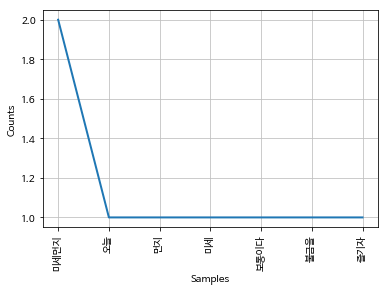

In [89]:
import matplotlib as plt
# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

tinstance.plot()